![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

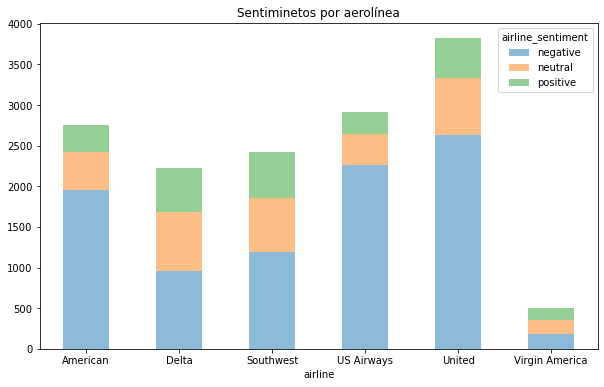

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from nltk import word_tokenize
import nltk

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [32]:
# Celda 1
vec = CountVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth': [None, 10, 20, 30],
#}

#modelo = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
#                           param_grid=param_grid,
#                           cv=5,
#                           scoring='accuracy')

#modelo.fit(X_train_vec, y_train)
#print("Mejores parámetros:", cv_rf_model.best_params_)
#print("Mejor score de validación cruzada (accuracy):", cv_rf_model.best_score_)

modelo = RandomForestClassifier(random_state=0)
modelo.fit(X_train_vec, y_train)

y_predicc = modelo.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_predicc)

print("Accuracy del modelo: {:.2f}%".format(accuracy * 100))

Accuracy del modelo: 77.38%


La precisión del modelo fue de 77.38% con la anterior, el modelo indica que tiene una buena precisión en el analisis de sentimientos de los tweets segun el texto.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 2
vec_stop = CountVectorizer(stop_words='english')

X_train_vec_stop = vec_stop.fit_transform(X_train)
X_test_vec_stop= vec_stop.transform(X_test)

modelo_2 = RandomForestClassifier(random_state=0)
modelo_2.fit(X_train_vec_stop, y_train)

y_predicc_2 = modelo_2.predict(X_test_vec_stop)
accuracy_2 = accuracy_score(y_test, y_predicc_2)

print("Accuracy del modelo después sin stopwords: {:.2f}%".format(accuracy_2 * 100))


Accuracy del modelo después sin stopwords: 76.18%


La precisión del modelo fue de 76.18% con la anterior, se puede inferir que debido a que los textos cortos como lo son los tweets pueden afectar las stopwords porque pueden tener información importante. 

Las palabras eliminadas fueron:

In [ ]:
print(vec_stop.get_stop_words())

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [24]:
# Celda 3
nltk.download('punkt')
nltk.download('wordnet')

lematizador = WordNetLemmatizer()

def lematizar_texto(texto):
    return [lematizador.lemmatize(word, pos='v') for word in word_tokenize(texto)]
    
vec_lemat = CountVectorizer(tokenizer=lematizar_texto)
X_train_vec_2 = vec_lemat.fit_transform(X_train)
X_test_vec_2 = vec_lemat.transform(X_test)

modelo_3 = RandomForestClassifier(random_state=0)
modelo_3.fit(X_train_vec_2, y_train)

y_predicc_3 = modelo_3.predict(X_test_vec_2)
accuracy_3 = accuracy_score(y_test, y_predicc_3)

print("Precisión del modelo con lematización de verbos: {:.2f}%".format(accuracy_3 * 100))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carit\AppData\Roaming\nltk_data...


Precisión del modelo con lematización de verbos: 77.65%


Se mantiene no la precisión del modelo con la lematización con uan precisión de 77.65%

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [31]:
# Celda 4

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

lematizador = WordNetLemmatizer()

def lematizar_stop_words(texto):
    words = word_tokenize(texto)
    words = [word for word in words if word.lower() not in stop_words]
    return [lematizador.lemmatize(word, pos='v') for word in words]

vect_lemat_2 = CountVectorizer(tokenizer=lematizar_stop_words)
X_train_vec_3 = vect_lemat_2.fit_transform(X_train)
X_test_vec_3 = vect_lemat_2.transform(X_test)

modelo_4 = RandomForestClassifier(random_state=0)
modelo_4.fit(X_train_vec_3, y_train)

y_predicc_4 = modelo_4.predict(X_test_vec_3)
accuracy_4 = accuracy_score(y_test, y_predicc_4)

print("Precisión del modelo con multiples técnicas: {:.2f}%".format(accuracy_4 * 100))


Precisión del modelo con multiples técnicas: 78.60%


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

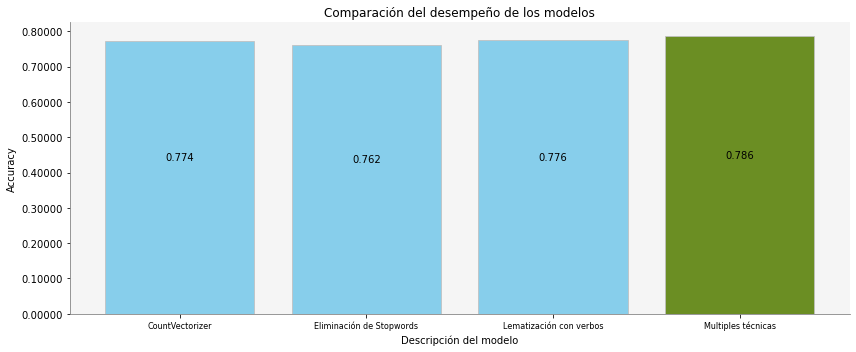

In [34]:
# Celda 5
def compararModelos(models, data, score):
    better = max(data)
    colores = ['#87CEEB' if value != better else '#6B8E23' for value in data]
    fig, ax = plt.subplots(figsize=(12,5))
    bar = ax.bar(models, data, linewidth=0.8, color=colores, edgecolor="silver")
    ax.set_title("Comparación del desempeño de los modelos")
    ax.set_xlabel("Descripción del modelo")
    ax.set_ylabel(score)
    bar_labels = [f'{value:.3f}' for value in data] 
    ax.bar_label(bar, bar_labels, label_type='center', padding=20)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor("whitesmoke")
    ax.spines["left"].set_color("gray")
    ax.spines["bottom"].set_color("gray")
    ax.tick_params(axis='x', labelsize=8)
    plt.gca().yaxis.set_major_formatter('{:,.5f}'.format)
    plt.tight_layout()
    plt.show()

modelos = ["CountVectorizer",'Eliminación de Stopwords', 'Lematización con verbos' , 'Multiples técnicas']
accuracys = [accuracy,accuracy_2,accuracy_3,accuracy_4]

compararModelos(modelos, accuracys, "Accuracy")

El mejor modelo fue el de la implementación con multiples tecnicas. La primera ventaja que se puede visualizar es que la eliminación de stopwords y la lematización proporcionan un enfoque mas robusto a la interpretación de los tweets.

La desventaja se podría dar porque es un modelo más complejo por lo que entrenarlo requiere mas tiempo, asi mismo puede existir un riesgo de sobreajuste.

El modelo con menor desempeño fue eliminación de stopwords, la ventaja que puede tener este modelo es la simplicidad ya que es facil de implementar y una tecnica mas sencilla que no requiere tanto esfuerzo computacional.  Para este escenario una desventaja fue que al eliminar estas palabras se puede perder el contexto debido a que los tweets son de una longitud corta. 